<a href="https://colab.research.google.com/github/SakaiYuna/ichiyasaGitSample/blob/master/Python%E3%81%AB%E3%82%88%E3%82%8B%E6%95%B0%E7%90%86%E8%A7%A3%E6%9E%90(%E5%89%8D%E5%8D%8A%E3%83%86%E3%82%AD%E3%82%B9%E3%83%88).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pythonによる数理解析(前半)
Numpyという配列処理のライブラリと，Matplotlibというグラフ描画ライブラリを用いて，自然現象の数理解析について学びます。

## 講義で使用するライブラリの読み込み

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from PIL import Image

---
# グラフ作成の基礎
## キャンバスと座標軸の作成

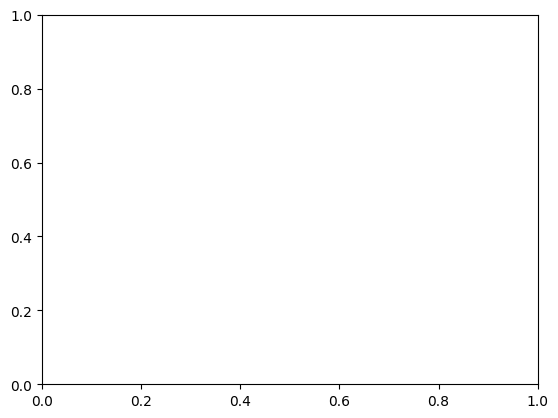

In [22]:
fig = plt.figure()          #キャンバスを作る
ax = fig.add_subplot(1,1,1) #1行1列の1番目に座標軸を作る


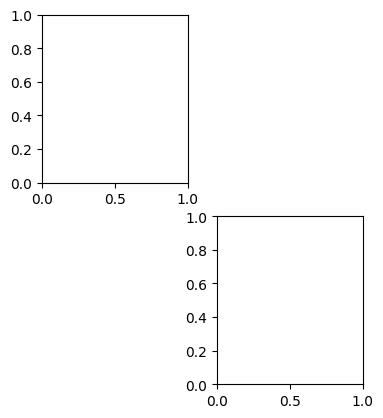

In [23]:
fig = plt.figure()
ax = fig.add_subplot(2,3,1) #2行3列の1番目に座標軸を作る
ax = fig.add_subplot(2,3,5) #2行3列の5番目に座標軸を作る

### 練習問題
キャンバス全体に座標軸ax1を一つ作成し，2行3列に分割したax1の右上にインセットとなる座標軸ax2を作りなさい。

[解説動画](https://youtu.be/KpgFnr7E8Bs)

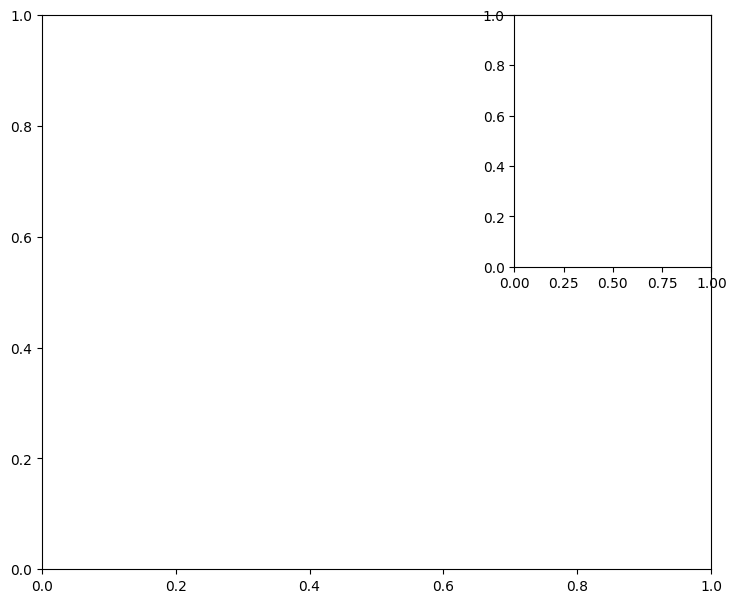

In [24]:
fig=plt.figure(figsize=(8.64,7.20)) #キャンバス準備
ax1=fig.add_subplot(1,1,1) #座標軸描出(何行に分けるか, 何列に分けるか, どの場所に配置するか)
ax2=fig.add_subplot(2,3,3) #グラフ追加(何行に分けるか, 何列に分けるか, どの場所に配置するか)

## グラフ
$y = x$の単純な散布図を作ってみます。

Text(0, 0.5, 'y label')

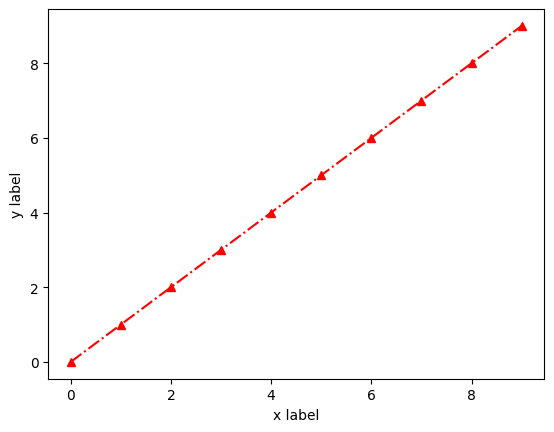

In [25]:
x = []                    # xの値を入力するための空の配列を作成
y = []                    # yの値を入力するための空の配列を作成

for i in range(10):
  x = np.append(x, i)
  y = np.append(y, i)

fig = plt.figure()             # キャンバス作成
ax = fig.add_subplot(1, 1, 1)  # 座標軸作成
#ax.plot(x, y)
#ax.plot(x, y, color='blue', marker='o', linestyle='None')   #青色，●，ライン無し
ax.plot(x, y, color='red', marker='^', linestyle='-.') #赤色，三角，破線
ax.set_xlabel('x label')
ax.set_ylabel('y label')
#plt.show()                    # 表示


### 練習問題
$x$軸を0-90とした時，10刻みで$y=x^2$の散布図を作りなさい。

[解説動画](https://youtu.be/aWb-ja3dQVA)

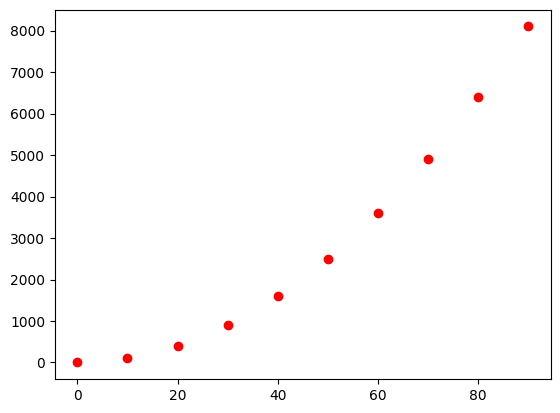

In [26]:
x=[]
y=[]

for i in range(10):
  x=np.append(x, i*10) #10,20,30,...90のリスト作成
  y=np.append(y, (i*10)**2) #xを二乗したリスト作成

#print(x)
#print(y)

fig=plt.figure() #キャンバス用意
ax=fig.add_subplot(1,1,1) #グラフの座標軸指定
ax.plot(x,y, color="red", marker="o", linestyle="None") #(x軸, y軸, 詳細設定)
plt.show()

### 練習問題
$x$軸を0-9とした時，1刻みで以下の散布図を作りなさい。

$y = x$　　　　　　　$(x < 5)$

$y = 10 - x$　　　　$(x >= 5)$

[解説動画](https://youtu.be/oNKd5Zi-Sl8)

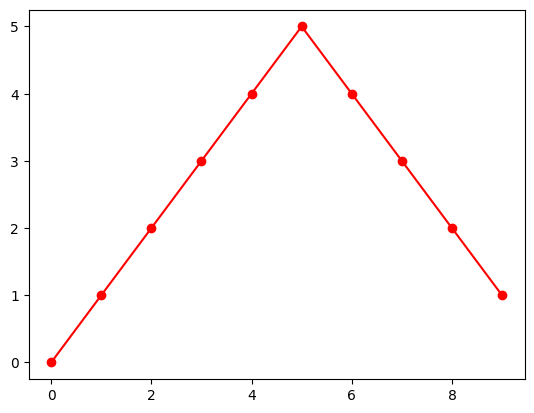

In [31]:
x=[]
y=[]

for i in range(10):
  x=np.append(x,i)
  if x[i]<5:
    y=np.append(y,x[i])
  else:
    y=np.append(y, 10-x[i])

fig=plt.figure() #キャンバス用意
ax=fig.add_subplot(1,1,1) #グラフの座標軸指定
ax.plot(x,y, color="red", marker="o", linestyle="-") #(x軸, y軸, 詳細設定)
plt.show()

---
## アニメーション

アニメーション用のライブラリ読み込み

In [32]:
from matplotlib import animation, rc
from IPython.display import HTML

y = xのグラフのプロットを1枚づつアニメーション表示するには，1枚づつをリストに格納して表示します。

まず，1枚づつのグラフを3x4として表示してみます。

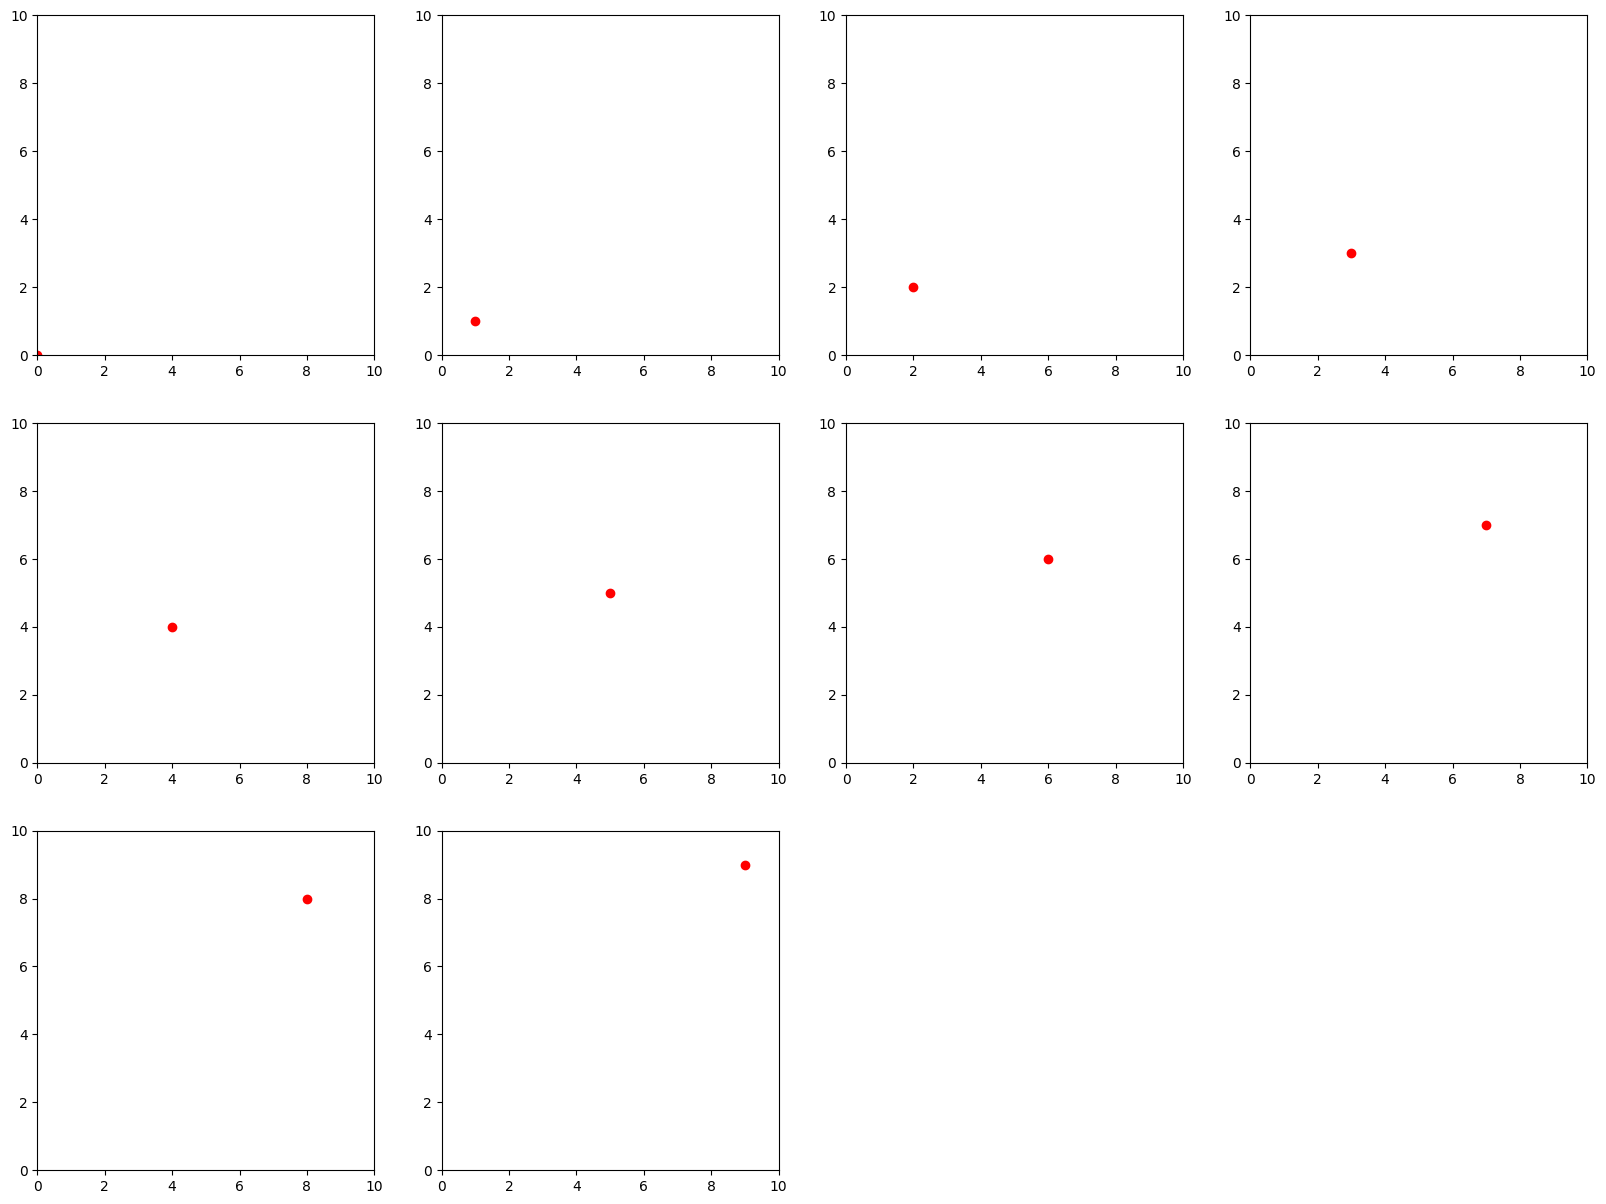

In [33]:
fig = plt.figure(figsize=(20, 15))

for i in range(10):
  x = i
  y = i
  ax = fig.add_subplot(3, 4, i+1)
  ax.plot(x, y, color='red', marker='o', linestyle='None')
  ax.set_xlim(0, 10)    # x軸を0-10に固定
  ax.set_ylim(0, 10)    # y軸を0-10に固定

plt.show()

グラフをimsのリストに格納してアニメーション表示

In [ ]:
ims = []    # 座標軸の空の配列を作成

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for i in range(10):
  x = i
  y = i
  im = ax.plot(x, y, color='red', marker='o', linestyle='None')
  ims.append(im)                          # グラフをリストに格納

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.close()                               # pltを閉じておかないとアニメーションと別にpltのグラフが表示されてしまう
ani = animation.ArtistAnimation(fig, ims) # アニメーションを作成
rc('animation', html='jshtml')            # Google Colaboratoryの場合必要
ani

### 練習問題
iを0から99まで1づつ増える変数とした時，

$y = \sin(x - i)$

$y = \cos(x - i)$

の2つの波の時間変化をアニメーション表示するプログラムを作りなさい。

$x$軸の範囲は0〜10, $y$軸の範囲は-1.2〜1.2としなさい。

ヒント：

$y = \sin(x)$は$y=$np.sin(x)と書くことができる。

関数fと関数gの両方をリストimsに追加するには

ims.append(f + g)

[解説動画](https://youtu.be/q3P8r7KjAA0)

---
# 力学

物体の運動をPythonでシミュレーションしてみましょう。

重力下での質点の運動方程式は

$$ m \frac{d^2 \mathbf{r}}{dt^2} = - m g $$

この運動方程式は解析的に簡単に解けますが，跳ね返りなどの境界条件を加えてしまうと，解析的に解くことは途端に難しくなります。

そこで，解析的に解くのではなく，数値的に解いてみましょう。

速度ベクトル$\mathbf{v} (=\frac{d\mathbf{r}}{dt})$を用いると運動方程式は

$$ \frac{d\mathbf{v}}{dt} = -g $$

微分の定義で書き直すと

$$ \lim_{\Delta t \to 0} \frac{\mathbf{v}(t+\Delta t) - \mathbf{v}(t)}{\Delta t} = -g $$

よって

$$ \mathbf{v}(t + \Delta t) = \mathbf{v}(t) -g \Delta t $$

重力が$-y$方向に働くとすると

$$ v_y (t + \Delta t) = v_y (t) -g \Delta t $$

初期条件として：

$t = 0$において$v_x = v_y =0$, $x=0$ [m], $y = 100$ [m]

$\Delta t = 0.1$ [sec]

とすると

In [ ]:
g = 9.8   # 重力加速度[m/s^2]
t = 0
dt = 0.1  # 時間幅[sec]
x = 0     # xの初期位置[m]
y = 100   # yの初期位置[m]
vx = 0   # x方向の初期速度[m/s]
vy = 0    # y方向の初期速度[m/s]

x_array = []
y_array = []

for i in range(50):
    vx = vx          # x方向の速度成分
    vy = vy - g * dt   # y方向の速度成分
    x  = x + vx * dt # time後のx座標
    y  = y + vy * dt  # time後のx座標
    t = t + dt       # 時刻[sec]

    x_array = np.append(x_array, x)
    y_array = np.append(y_array, y)

fig = plt.figure()             # キャンバス作成
ax = fig.add_subplot(1, 1, 1)  # 座標軸作成
ax.plot(x_array, y_array, c='red', marker='o')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
plt.show()

アニメーションにすると

In [ ]:
fig = plt.figure()             # キャンバス作成
ax = fig.add_subplot(1, 1, 1)  # 座標軸作成
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_xlim(-1,1)
ax.set_ylim(0,120)

g = 9.8   # 重力加速度[m/s^2]
t = 0
dt = 0.1  # 時間幅[sec]
x = 0     # xの初期位置[m]
y = 100   # yの初期位置[m]
vx = 0   # x方向の初期速度[m/s]
vy = 0    # y方向の初期速度[m/s]

ims = []

for i in range(50):
    vx = vx          # x方向の速度成分
    vy = vy - g * dt   # y方向の速度成分
    x  = x + vx * dt # time後のx座標
    y  = y + vy * dt  # time後のx座標
    t = t + dt       # 時刻[sec]

    ball = ax.plot(x, y, c='red', marker='o')
    ims.append(ball)

plt.close()
ani = animation.ArtistAnimation(fig, ims) # アニメーションを作成
rc('animation', html='jshtml')            # Google Colaboratoryの場合必要
ani

### 練習問題
$v_x(t=0)=10$ [m/sec]の時の，ボールの軌跡をアニメーションで描画しなさい。

[解説動画](https://youtu.be/j9gp7I_u7E4)

### 練習問題
$y=0$ [m]でボールが完全反射する時の軌跡をアニメーションで描画しなさい。
[解説動画](https://youtu.be/XVLMPWrDXNU)

### 練習問題
上の問題において，軌跡を残しながらアニメーションを表示しなさい。
[解説動画](https://youtu.be/-LwtrM1L_3E)

作ってきたシミュレーションが正しいかどうかの検算をしましょう。

ここまで行ってきた計算は運動方程式の時間積分でした。

運動方程式の空間関分であるエネルギーが保存されているかどうかを確認しましょう。

力学的エネルギー$E$は

$E = \frac{1}{2}m \mathbf{v}^2 + mgy$

で考えることができます。

### 練習問題

$m=1$ [kg]とした時，左図に運動の軌跡表示，右図に力学的エネルギーの時間変化のグラフを表示しましょう。アニメーションは不要です。

[解説動画](https://youtu.be/fHjZXbSjRtc)

エネルギーが一定にならないのは何故だろうか？

### 練習問題

エネルギーの平均値: $\bar{E}=\frac{\Sigma_{i=0}^{i=n-1}E_i}{n}$

エネルギーの標準偏差：$s = \sqrt{\frac{1}{n} \Sigma_{i=0}^{i=n-1}(E_i - \bar{E})^2}$

をそれぞれ計算しなさい。


[解説動画](https://youtu.be/Z9C7Dn3_smM)

エネルギーの誤差が大きいのは$dt=0.1$ secとしていることが原因。

$dt = 0.01$ secとすれば誤差は本当に小さくなるだろうか？

### 練習問題
$dt = 0.01$ secとした時のエネルギーの平均値と標準偏差を求めなさい。

ただし，サンプリング数は変更しないように!

[解説動画](https://youtu.be/8X5p2CFGz5s)

---
# 画像の読み書き

幅が400ピクセル，高さが300ピクセルのlena.jpgをNumpyで読み込みMatplotlibで表示しましょう。

In [ ]:
! wget -O lena.jpg https://i.gzn.jp/img/2009/06/18/lenna/000.jpg #lena.jpgのダウンロード

In [ ]:
image = np.array(Image.open('lena.jpg'))  #絵を配列として読み込む
plt.imshow(image)                         #表示

配列の中身がどのようになっているのかを確認しましょう。

In [ ]:
print(image)

配列の形状を確認しましょう。(行数，列数，rgbの3成分)

In [ ]:
print(image.shape)

配列のサイズを確認しましょう。

In [ ]:
print(image.size)

[r g b]のgを0にして，緑成分を消してみましょう。

In [ ]:
green = [i for i in range(1, image.size, 3)]

np.put(image, green, 0)
plt.imshow(image)

### 練習問題
400 x 300 pxの大きさで上半分が赤色，下半分が青色となる画像を作りなさい。

[解説動画](https://youtu.be/zEJiUy8-ANM)

### 練習問題
400 x 300 pxの大きさで左半分が赤色，右半分が青色となる画像を作りなさい。

[解説動画](https://youtu.be/mlhJq9WcBOk)

---
# 拡散方程式
熱や水に溶かしたインクなど拡散する場合拡散物質の密度$\phi$は次に示す拡散方程式に従います。

$$\frac{d \phi}{d t} = D \cdot \frac{d^2 \phi}{d \mathbf{r}^2}$$

ここで$D$は拡散係数，$t$は時間，$\mathbf{r}$は位置ベクトルです。

微分の定義より左辺は

$$ \frac{d \phi}{d t} = \frac{\phi(t + \Delta t) - \phi(t)}{\Delta t} $$

とかけますが，2回微分がある右辺を考えてみましょう。簡単のために一次元$\mathbf{r} = x $として考えると，

$$ \frac{d \phi}{d x} = \frac{\phi(x + \Delta x) - \phi(x)}{\Delta x} $$

ですので，

$$ \frac{d^2 \phi}{dx^2} = \frac{\frac{\phi(x+\Delta x)-\phi(x)}{\Delta x} - \frac{\phi(x)-\phi(x-\Delta x)}{\Delta x}}{\Delta x} = \frac{-2 \phi(x)+\phi(x-\Delta x)+\phi(x+\Delta x)}{\Delta x^2}$$

となります。よって

$$ \phi(t+\Delta t) = \phi(t) +D \frac{\Delta t}{\Delta x^2} \cdot \{ -2\phi(x) + \phi(x-\Delta x) + \phi(x+\Delta x)\} $$

となります。ここで，物質中における熱$Q$の伝搬を考えると，比熱$C$，温度$T$を用いて$Q = CT$であるため，温度$T$の伝搬は

$$ T(t+\Delta t) = T(t) +D \frac{\Delta t}{\Delta x^2} \cdot \{ -2 T(x) + T(x-\Delta x) + T(x+\Delta x)\} $$

となります。

## 1次元拡散方程式
以下では上記の式を用いて，一次元の棒における温度の伝搬がどのようになるかを考えます。

下の図のような，長さ10の棒における温度の伝搬を考えます。

In [ ]:
image = []
for i in range (10):
    image = np.append(image, [0, 0, 0])

image = image.astype(int)
image = image.reshape([1,10,3])

plt.figure(figsize=(20, 5))
plt.imshow(image)

### 練習問題
長さ10の1次元棒における温度の伝搬を考える。時刻$t = 0$において，左端の温度を$T=255$ 度，その以外の領域の温度が0 度であり，$t>0$において左端の温度を255 度で保った時の$t=300$における一次元棒の温度分布を色で示しなさい。ただし，温度が高い方が赤色，温度が低い方を青色とする。また右端は0 度に熱アンカーされており，拡散係数は$D=0.1$であるとする。$\Delta t = 1$，$\Delta x =1$とする。

[解説動画](https://youtu.be/oyZ4S5qdMM4)

### 練習問題
上記の問題において，右端を熱アンカーせず浮かせた場合，$t=300$における温度分布を色で示しなさい。

[解説動画](https://youtu.be/bVJTI00ZGvw)

## 2次元拡散方程式
$\mathbf{r}=(x, y)$の2次元平面での拡散方程式は

$$ \frac{d\phi}{dt} = D \cdot (\frac{d^2 \phi}{dx^2} + \frac{d^2 \phi}{dy^2})$$

と書けるため

$$ \phi(t+\Delta t) = \phi(t) +D \frac{\Delta t}{\Delta x^2} \cdot \{ -4\phi + \phi(x-\Delta x) + \phi(x+\Delta x)\ + \phi(y-\Delta y) + \phi(y+\Delta y)\} $$

となります。

このことを踏まえて，2次元の場合の温度変化を考えましょう。

### 練習問題

縦25x横50のサイズで2次元の熱伝導を考える。時刻$t=0$では領域内は全て0度であるとする。$t>0$で左面の境界($x=0$)を255度で熱し続けた時の$t=1000$における温度分布を絵として表示しなさい。ただし，その他の領域($x=51, y=0 or 26$)は常に0度に熱アンカーされており，拡散係数は$D=0.1$であるとする。$\Delta t = 1$，$\Delta x = \Delta y =1$とする。

[解説動画](https://youtu.be/6-qrtPOYVyM)